
<h1 align="center"> DengAI: Predicting Disease Spread </h1>
<h2 align="right"> Alex de Vries, October 2021 </h2>

Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce—**can you predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru?**

### Background information
- https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/
- https://dengueforecasting.noaa.gov/
- https://github.com/ngbolin/DengAI/blob/master/DengAI.ipynb
---

# 1) Preperations

In [111]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [39]:
#Load Data and organize based on first 3 columns (city, year, weekofyear)
test_features = pd.read_csv("dengue_features_test.csv", index_col= [0, 1, 2])
train_features = pd.read_csv("dengue_features_train.csv", index_col= [0, 1, 2])
train_labels = pd.read_csv("dengue_labels_train.csv", index_col= [0, 1, 2])

In [40]:
test_features.head()

week_start_date  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                          
sj   2008 18              2008-04-29  -0.0189 -0.018900  0.102729  0.091200   
          19              2008-05-06  -0.0180 -0.012400  0.082043  0.072314   
          20              2008-05-13  -0.0015       NaN  0.151083  0.091529   
          21              2008-05-20      NaN -0.019867  0.124329  0.125686   
          22              2008-05-27   0.0568  0.039833  0.062267  0.075914   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   2008 18                         78.60             298.492857   
          19                         12.56             298.475714   
          20                          3.66             299.455714   
          21                          0.00             299.690000   
          22                          0.76             299.780000   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   2008 18                     298.550000                   294.527143   
          19                     298.557143                   294.395714   
          20                     299.357143                   295.308571   
          21                     299.728571                   294.402857   
          22                     299.671429                   294.760000   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   2008 18                              301.1  ...   
          19                              300.8  ...   
          20                              302.2  ...   
          21                              303.0  ...   
          22                              302.3  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   2008 18                                    25.37   
          19                                    21.83   
          20                                     4.12   
          21                                     2.20   
          22                                     4.36   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   2008 18                                     78.781429   
          19                                     78.230000   
          20                                     78.270000   
          21                                     73.015714   
          22                                     74.084286   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   2008 18                                 78.60   
          19                                 12.56   
          20                                  3.66   
          21                                  0.00   
          22                                  0.76   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   2008 18                                      15.918571   
          19                                      15.791429   
          20                                      16.674286   
          21                                      15.775714   
          22                                      16.137143   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   2008 18                   3.128571           26.528571   
          19                   2.571429           26.071429   
          20                   4.428571           27.928571   
          21                   4.342857           28.057143   
          22           

In [41]:
train_labels.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

# 2) Preprocessing/feature selection

In [42]:
# Seperate data for San Juan (sj) and Iquitos (iq)
sj_train = train_features.loc['sj']
sj_test = test_features.loc['sj']
sj_labels = train_labels.loc['sj']

iq_train = train_features.loc['iq']
iq_test = test_features.loc['iq']
iq_labels = train_labels.loc['iq']

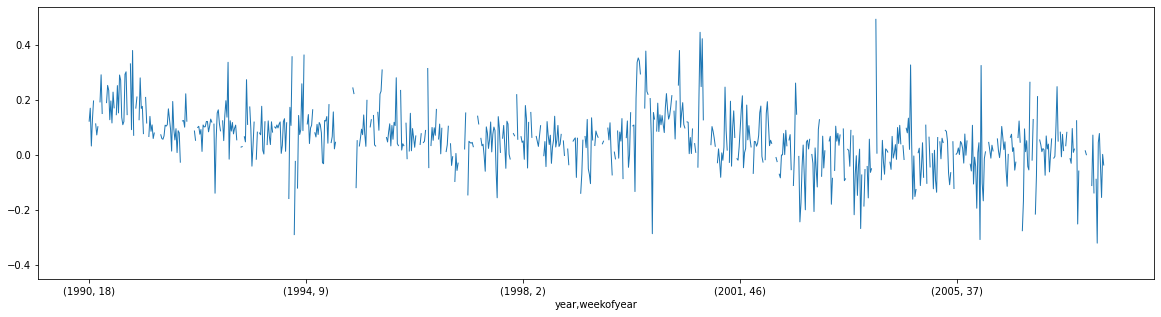

In [75]:
#plotting a feature from the data we can visually see missing data. Let's check in more detail
plt.figure(figsize = (20, 5))
(sj_train.ndvi_ne.plot.line(lw = 1))
plt.show()

In [56]:
# Check missing data for San Juan data
print (sj_train.shape)
sj_train.apply(lambda x: sum(x.isnull()))

(936, 21)


week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
dtype: int64

In [57]:
# Check missing data for Iquitos
print (iq_train.shape)
iq_train.apply(lambda x: sum(x.isnull()))

(520, 21)


week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
dtype: int64

After reviewing the data in more detail, a reasonable way to deal with missing data in this case is to fill missing data with the value that came before it.

In [78]:
# we fill missing data with Forward fill (ffill) and change the original df (inplace = True)
sj_train.sort_index(inplace = True)
sj_train.fillna(method = 'ffill', inplace = True)
sj_test.fillna(method = 'ffill', inplace = True)

iq_train.sort_index(inplace = True)
iq_train.fillna(method = 'ffill', inplace = True)
iq_test.fillna(method = 'ffill', inplace = True)

In [82]:
#drop week start date column as it's not relevant in the final analysis
sj_train.drop('week_start_date', axis = 1, inplace = True)
iq_train.drop('week_start_date', axis = 1, inplace = True)

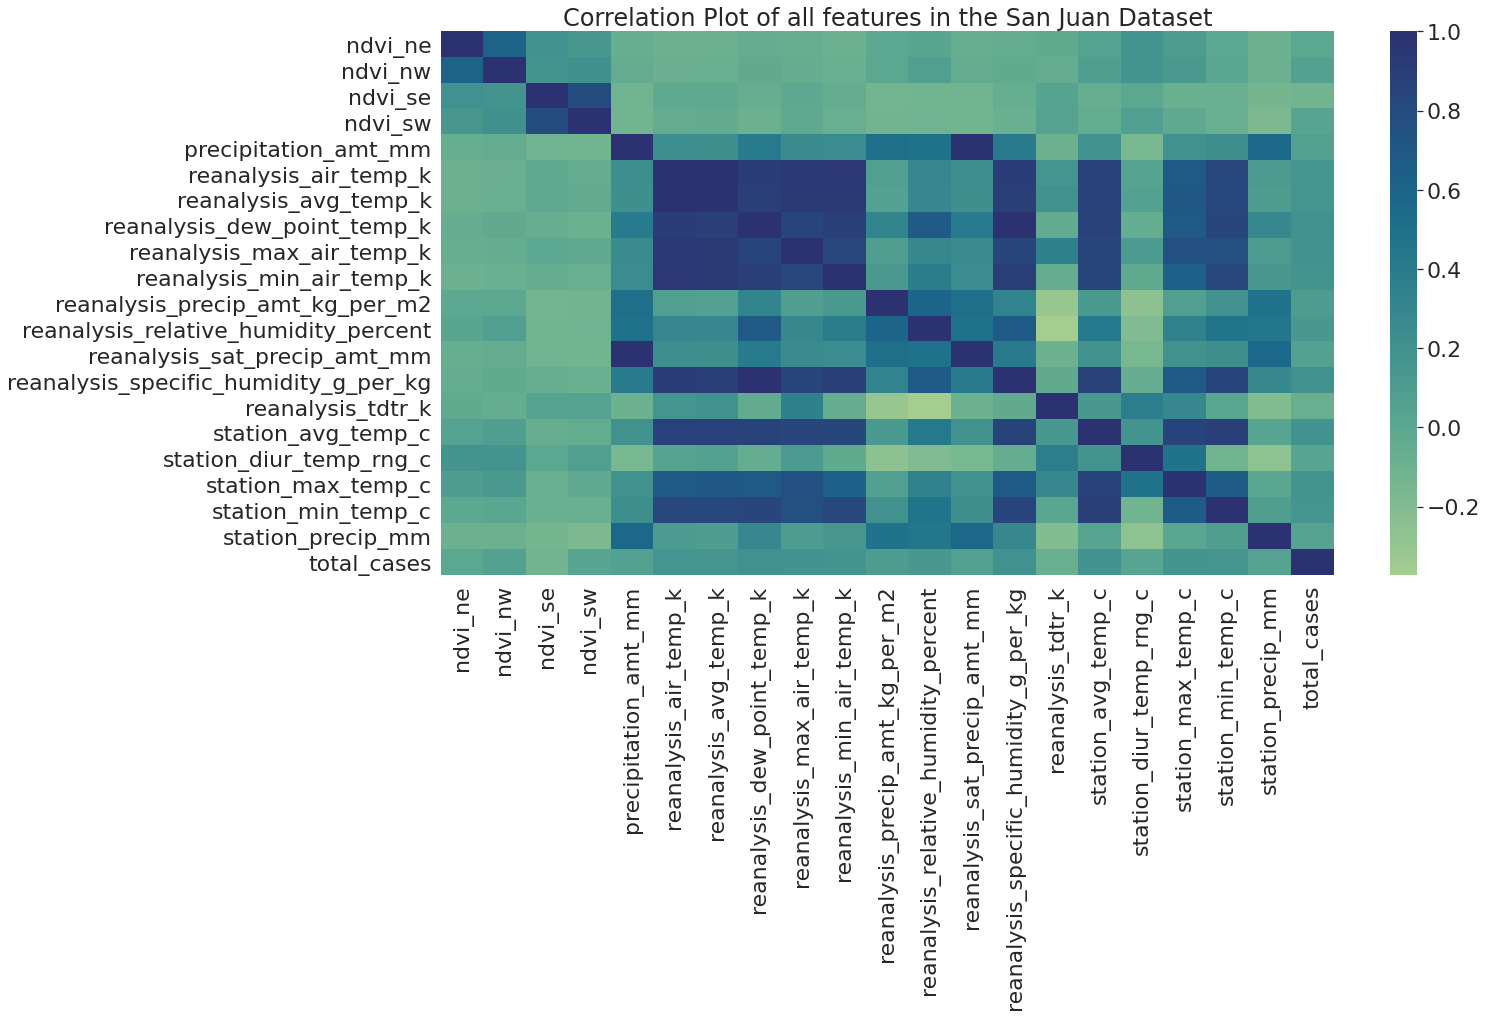

In [103]:
sj_train['total_cases'] = sj_labels['total_cases']
sj_corr = sj_train.corr()
sns.set(font_scale = 2)
plt.figure(figsize=(20, 10))
sns.heatmap(sj_corr, cmap='crest')
plt.title('Correlation plot of all features in the San Juan dataset')
plt.show()

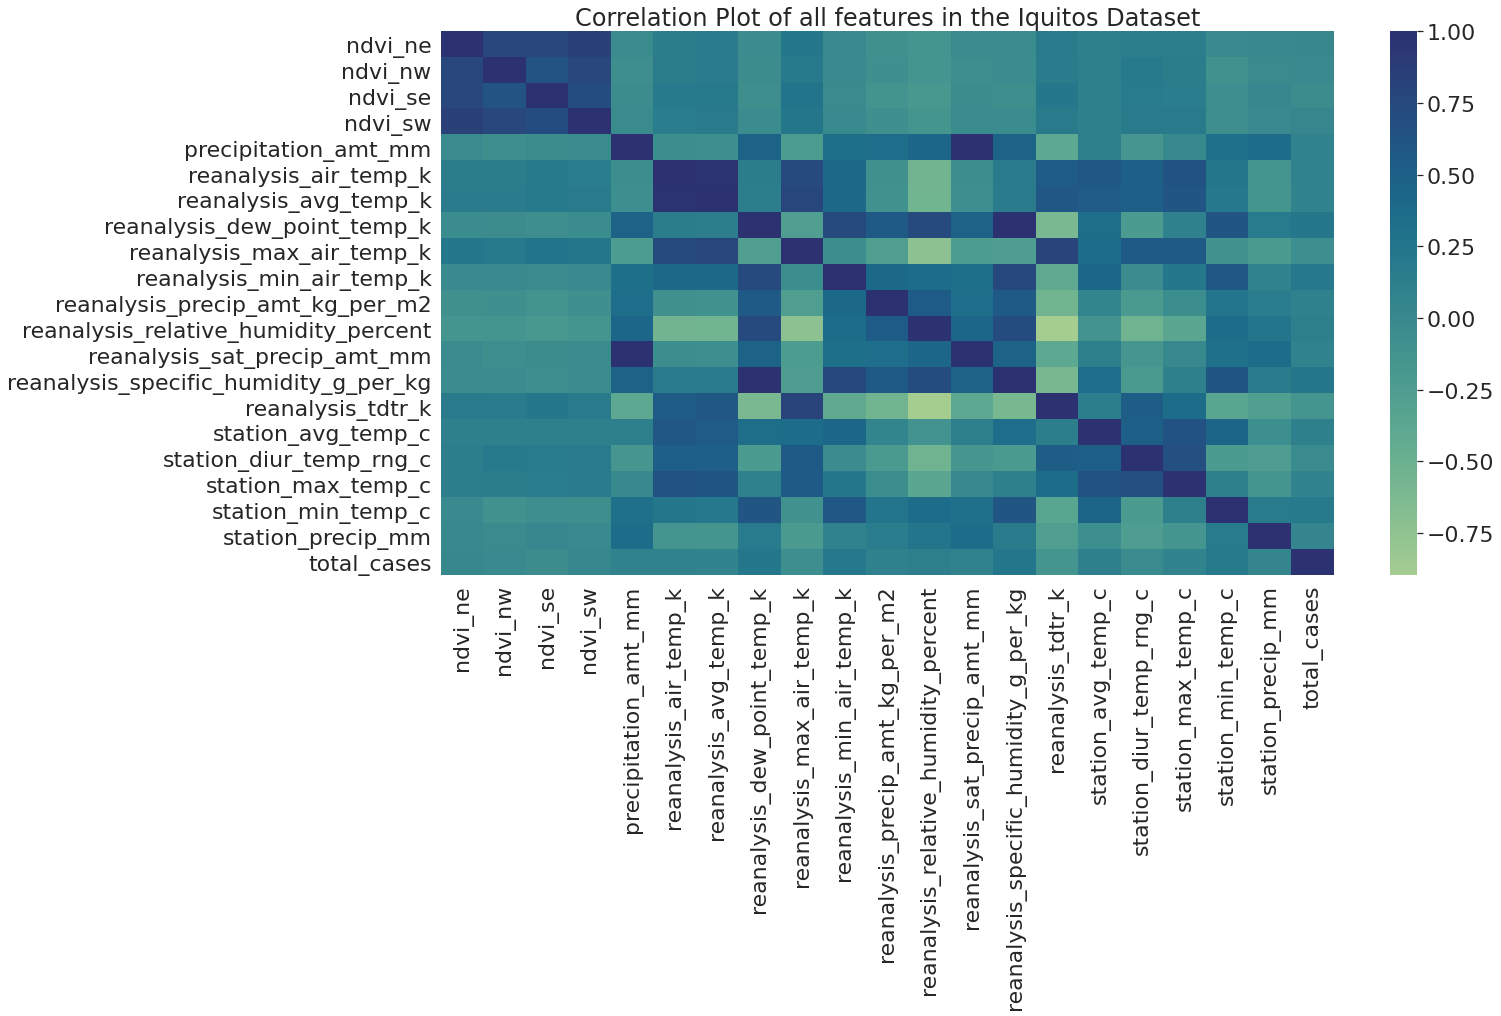

In [105]:
iq_train['total_cases'] = iq_labels['total_cases']
iq_corr = iq_train.corr()
sns.set(font_scale = 2)
plt.figure(figsize=(20, 10))
sns.heatmap(iq_corr, cmap='crest')
plt.title('Correlation plot of all features in the Iquitos dataset')
plt.show()

#### Comparing the two correlation plots.
The first thing to note is that the correlation between the features have differences between the two regions. 
- For Iquitos there is more correlation between features in general.
- For Iguitos there is more correlation between the ndvi features.
- For San Juan there is a clearer correlation between certain reanalysis air quality features.
- No feature is very good at predicting total_cases.

This indicates that we need to select different features for each region to get the best predictions. 
Let's now compare the features which most highly correlate with total_cases.

<AxesSubplot:>

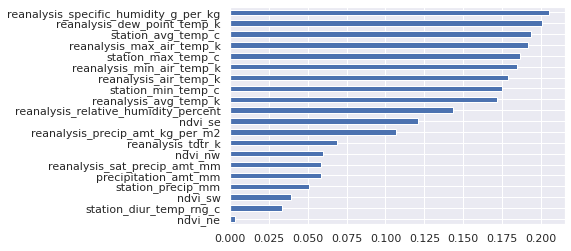

In [109]:
sns.set()
(abs(sj_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

<AxesSubplot:>

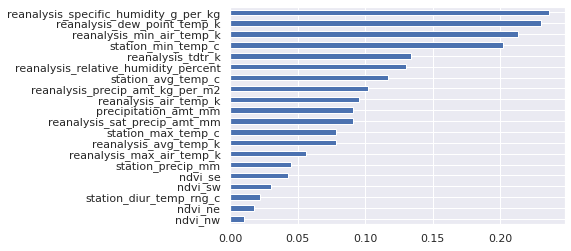

In [110]:
sns.set()
(abs(iq_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

#### Comparing the two correlation histograms
The same features are most highly correlated with total_cases for both data sets. Humidity (g/kg), Dew point temperature (K), minimum air temperature (K) and station minimum temperature (C) all seem to affect Dengue cases.